<a href="https://colab.research.google.com/github/NatashaSikinyi/Financial-Inclusion/blob/main/Moringa_Data_Science_Core_Independent_Project_Wk7_2022_05_Natasha_Sikinyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINANCIAL INCLUSION IN EAST AFRICA**

---
*Specifying the question*: How can we predict which individuals are most likely to have or use a bank account?


*Metric for success*: Overcome one of the main obstacle to economic and human development in Africa of financial inclusion.


*Context*: The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


*Experimental Design taken*: Building a classifier which can help us to identify and select features which can describe the characteristics of the group of individuals that are most likely to have or use a bank account.


*Appropriatness of available data*: The data given contains both financial data and variable definitions



In [ ]:
#importing important modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Reading the data**

In [ ]:
#loading data from the data source
FinData_df = pd.read_csv('http://bit.ly/FinancialDataset')


**Checking the data**

In [ ]:
#determining number of records in the dataset
FinData_df.shape


(23524, 13)

In [ ]:
#previweing the top of our dataset
FinData_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#previweing the bottom of our dataset
FinData_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#checking whether each column has a datatype
FinData_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
FinData_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
#External data source validation

**Tidying the dataset**

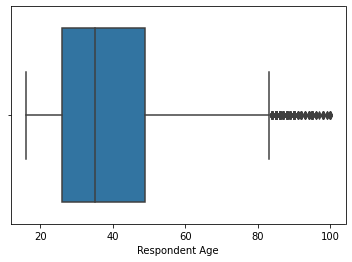

In [ ]:
#checking for outliers

sns.boxplot(x=FinData_df['Respondent Age'])
plt.show()

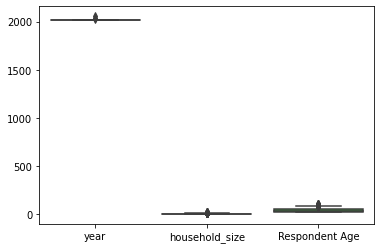

In [ ]:
#checking for anomalies

sns.boxplot(data=FinData_df)

In [ ]:
#checking for missing data
FinData_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
FinData_df.replace("uniqueid_1538")


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [ ]:
#more data cleaning procedures
FinData_df.info

<bound method DataFrame.info of       country  year       uniqueid Has a Bank account Type of Location  \
0       Kenya  2018     uniqueid_1                Yes            Rural   
1       Kenya  2018     uniqueid_2                 No            Rural   
2       Kenya  2018     uniqueid_3                Yes            Urban   
3       Kenya  2018     uniqueid_4                 No            Rural   
4       Kenya  2018     uniqueid_5                 No            Urban   
...       ...   ...            ...                ...              ...   
23519  Uganda  2018  uniqueid_2113                 No            Rural   
23520  Uganda  2018  uniqueid_2114                 No            Rural   
23521  Uganda  2018  uniqueid_2115                 No            Rural   
23522  Uganda  2018  uniqueid_2116                 No            Urban   
23523  Uganda  2018  uniqueid_2117                 No            Rural   

      Cell Phone Access  household_size  Respondent Age gender_of_respondent  \

**Exploratory Analysis**

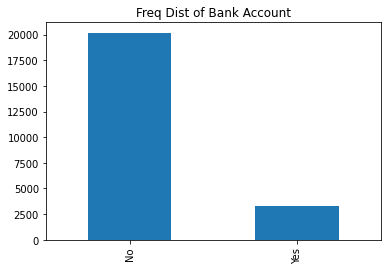

In [ ]:
# Plotting univariate summaries and recording observations

FinData_df['Has a Bank account'].value_counts().plot.bar(title="Freq Dist of Bank Account")


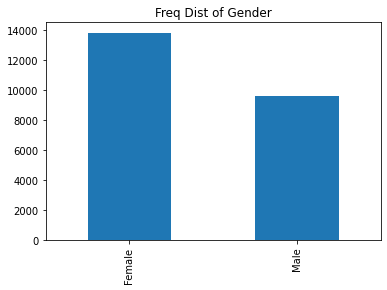

In [ ]:
FinData_df['gender_of_respondent'].value_counts().plot.bar(title="Freq Dist of Gender")

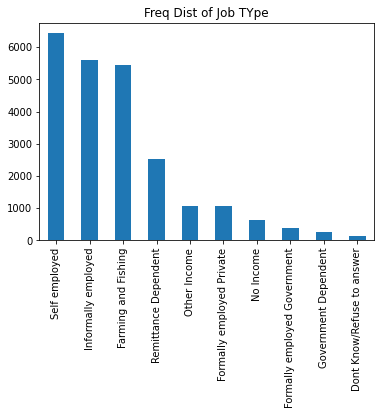

In [ ]:
FinData_df['Type of Job'].value_counts().plot.bar(title="Freq Dist of Job TYpe")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


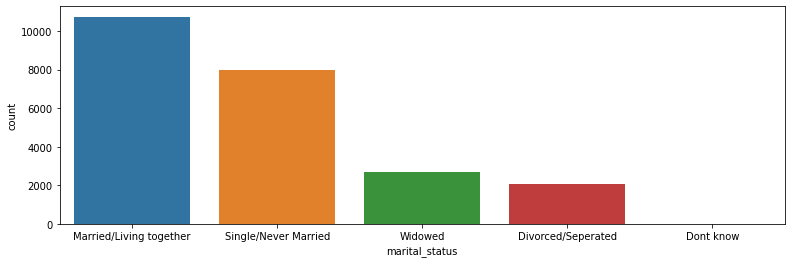

In [ ]:
plt.figure(figsize=(13, 4))
sns.countplot(FinData_df.marital_status.dropna(), order = FinData_df.marital_status.value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


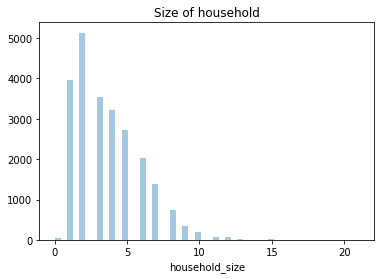

In [ ]:
sns.distplot(FinData_df.household_size, kde=False)
plt.title('Size of household')
plt.show();

A large number of people do not have bank accounts.

Those who do have bank accounts are majorly women and are self employed.

A huge portion of the surveyed population are either married/living together or single/have never married.

I would reccomend banks targeting these populations.

<function matplotlib.pyplot.show>

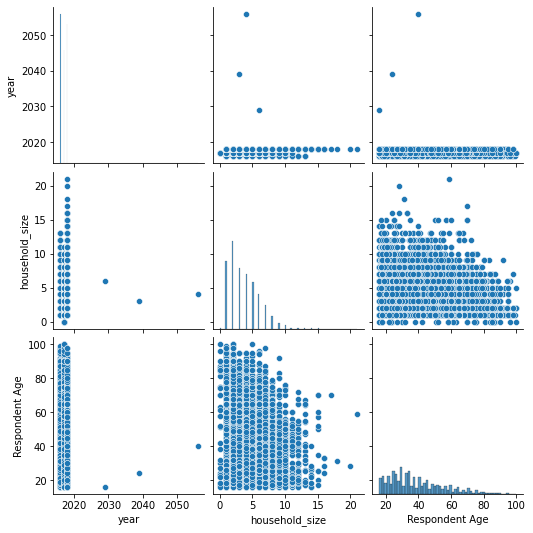

In [ ]:
# Plotting bivariate summaries and recording observations
sns.pairplot(FinData_df)
plt.show

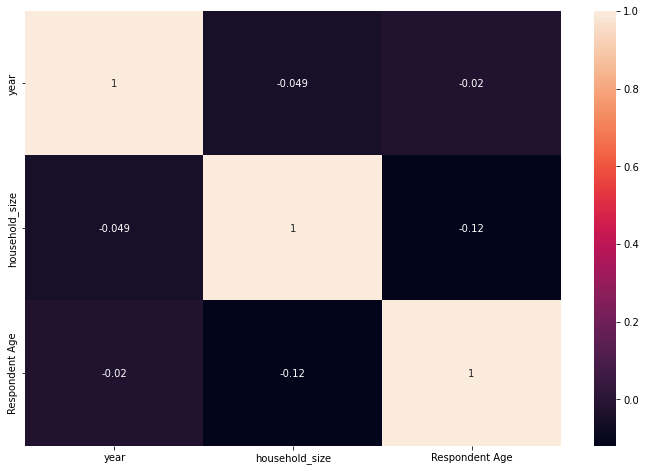

In [ ]:
plt.figure(figsize=(12, 8))

FinData_corr = FinData_df.corr()
sns.heatmap(FinData_corr, 
            xticklabels = FinData_corr.columns.values,
            yticklabels =FinData_corr.columns.values,
            annot = True);

<Figure size 1008x1008 with 0 Axes>

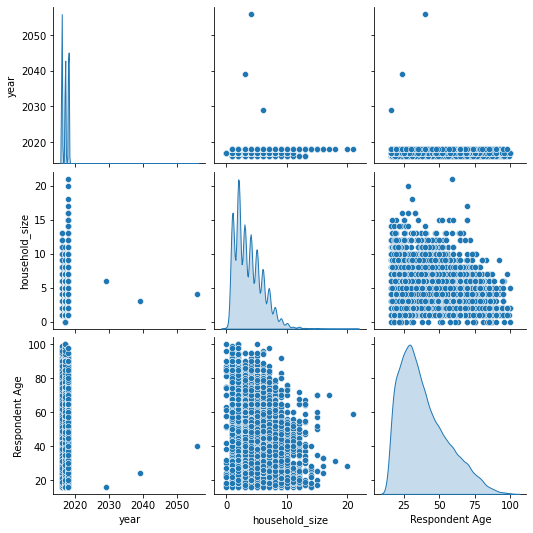

In [ ]:
plt.figure(figsize=(14, 14))

sns.pairplot(FinData_df, diag_kind='kde');

A large number of bank holders are people between the ages of 25 and 45, which is thw timeline in which most people start their jobs and/or businesses.
More awarness should be spread that having a bank account from an early age earnd you a good credit score.

Less people from larger households have bank accounts whether or not they are the breadwinners since money received is used up immediately with little left to save.

In [ ]:
# Data reducution

X = FinData_df.drop('country', 1)
y = FinData_df['country']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

In [ ]:
# Implementing the solution

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


**Challenging the solution**

The data is comprehensive although some of the data is missing especially for age and gender of respondent as well as whether they have a bank account or not which is pivotal in the research.

The solution seeks to benefit those in urban areas and could be made more inclusive of people in other demographic areas


The solution is less in favour of individuals with other forms of income and could be made to include a wider variety of socio-economic backgrounds

